# EXPRESSION CLASSIFIER

In [30]:
import splitfolders
import os

In [31]:
mpath="D:\PROJECT\p1"
print(os.listdir(mpath))

['happy', 'neutral', 'sad', 'surprise']


## Splitting the files for Test,Train and Validation

In [28]:
splitfolders.ratio(mpath,seed=1337,output="Expressions",ratio=(0.7,0.3,0))

Copying files: 32298 files [16:21, 32.92 files/s]


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
import tensorflow as tf
from tensorflow import keras

In [52]:
train_dir=r"D:\PROJECT\Exp_project\train"
validation_dir=r"D:\PROJECT\Exp_project\val"
test_dir=r"D:\PROJECT\Exp_project\test"

# Data Preprocessing

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [54]:
train_gen=ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True)
test_gen=ImageDataGenerator(rescale=1./255)

In [55]:
train_generator=train_gen.flow_from_directory(train_dir,
                                             target_size=(96,96),
                                             batch_size=100,
                                             class_mode="sparse")
validation_generator=test_gen.flow_from_directory(validation_dir,
                                                 target_size=(96,96),
                                                 batch_size=50,
                                                 class_mode="sparse")

Found 10378 images belonging to 4 classes.
Found 5188 images belonging to 4 classes.


# Model Architecture

In [56]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50

In [57]:
conv=VGG16(weights="imagenet",
           include_top=False,
           input_shape=(96,96,3))

In [58]:
conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

In [59]:
model=models.Sequential()
model.add(conv)
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(4,activation='softmax'))

In [60]:
from keras import optimizers
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [61]:
cb=keras.callbacks.ModelCheckpoint("Expression_prjt.keras",save_best_model=True)
es=keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)

# Model Training

In [62]:
his=model.fit(train_generator,
         steps_per_epoch=103,
         epochs=30,
         validation_data=validation_generator,
         validation_steps=103,
          callbacks=[cb,es]) 

Epoch 1/30
103/103 [==============================] - 1179s 11s/step - loss: 1.3232 - acc: 0.3411 - val_loss: 1.2366 - val_acc: 0.4437
Epoch 2/30
103/103 [==============================] - 1076s 10s/step - loss: 0.8601 - acc: 0.6009 - val_loss: 0.6286 - val_acc: 0.7631
Epoch 3/30
103/103 [==============================] - 1028s 10s/step - loss: 0.5837 - acc: 0.7668 - val_loss: 0.7147 - val_acc: 0.7353
Epoch 4/30
103/103 [==============================] - 1024s 10s/step - loss: 0.4913 - acc: 0.8123 - val_loss: 0.4263 - val_acc: 0.8268
Epoch 5/30
103/103 [==============================] - 1003s 10s/step - loss: 0.4022 - acc: 0.8430 - val_loss: 0.4049 - val_acc: 0.8421
Epoch 6/30
103/103 [==============================] - 1003s 10s/step - loss: 0.3619 - acc: 0.8617 - val_loss: 0.3359 - val_acc: 0.8697
Epoch 7/30
103/103 [==============================] - 1006s 10s/step - loss: 0.3223 - acc: 0.8802 - val_loss: 0.3256 - val_acc: 0.8765
Epoch 8/30
103/103 [==============================] - 1

# Data Visualisation

[]

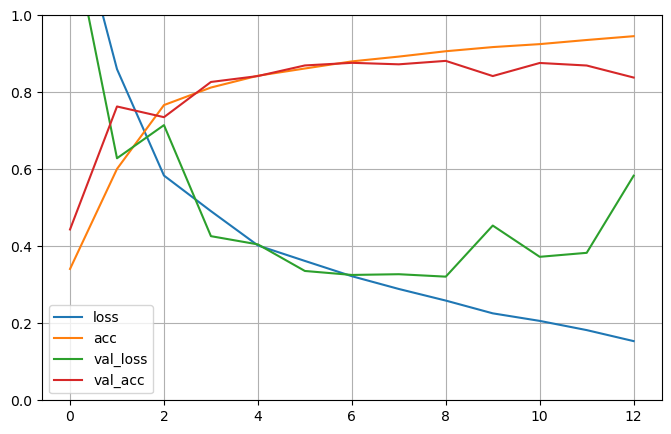

In [63]:
pd.DataFrame(his.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.plot()

# Model Testing

In [64]:
test_generator=test_gen.flow_from_directory(test_dir,
                                           target_size=(96,96),
                                           class_mode='sparse')

Found 1734 images belonging to 4 classes.


In [65]:
model.evaluate(test_generator)

55/55 [==============================] - 42s 776ms/step - loss: 0.3186 - acc: 0.8858


[0.3185512125492096, 0.8858131766319275]

In [29]:
model.save('final_exp_project.keras')